# Итоговая работа по курсу «Python и математика для анализа данных»

Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy import stats

Загружаем файл hr.csv.
* **satisfaction_level** уровень удовлетворенности сотрудника, аналог NPS
* **last_evaluation** оценка сотрудника, например, в ходе аттестации (уточнять у владельца датасета)
* **number_project** количество проектов в которых задействован сотрудник
* **average_montly_hours** среднее количество рабочих часов в месяц у сотрудника 
* **time_spend_company** сколько лет сотрудник работает в компании
* **Work_accident** несчатные случаи на работе 
* **left** сотрудник покинул компанию (1- да, 0 - нет)
* **promotion_last_5years** повышения сотрудника за последние 5 лет (1 - да, 0 - нет) 
* **sales** департамент, к которому относится сотрудник
* **salary** категория зарплаты сотрудника (low, medium, hight)

In [34]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Рассчитаем основные статистики для переменных satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company.**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [125]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Среднее для satisfaction_level: 0.6128335222348157
Медиана для satisfaction_level: 0.64
Значение моды для satisfaction_level: 0.1
Минимальное значение для satisfaction_level: 0.09
Максимальное значение для satisfaction_level: 1.0
Стандартное отклонение: 0.2486223626820733


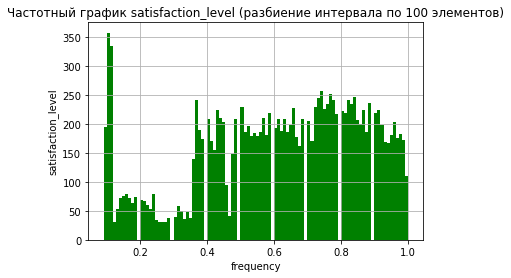

In [46]:
#рассчитываем среднее,медиана,мода,мин/макс,сред.отклонение для satisfaction_level
df=df.dropna(subset=['satisfaction_level'])
print('Среднее для satisfaction_level:', statistics.mean(df['satisfaction_level']))
print('Медиана для satisfaction_level:', statistics.median(df['satisfaction_level']))
print('Значение моды для satisfaction_level:', statistics.mode(df['satisfaction_level']))
print('Минимальное значение для satisfaction_level:', min(df['satisfaction_level']))
print('Максимальное значение для satisfaction_level:', max(df['satisfaction_level']))
print('Стандартное отклонение:', statistics.pstdev(df['satisfaction_level']))
n, bins, patches = plt.hist(df['satisfaction_level'], 100, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('satisfaction_level')
plt.title('Частотный график satisfaction_level (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Среднее для last_evaluation: 0.7161017401160077
Медиана для last_evaluation: 0.72
Значение моды для last_evaluation: 0.55
Минимальное значение для last_evaluation: 0.36
Максимальное значение для last_evaluation: 1.0
Стандартное отклонение для last_evaluation: 0.1711634045107436


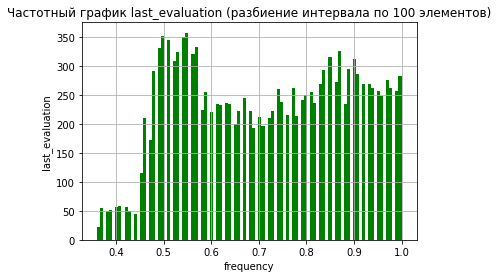

In [47]:
#рассчитываем среднее,медиана,мода,мин/макс,сред.отклонение для last_evaluation
df=df.dropna(subset=['last_evaluation'])
print('Среднее для last_evaluation:', statistics.mean(df['last_evaluation']))
print('Медиана для last_evaluation:', statistics.median(df['last_evaluation']))
print('Значение моды для last_evaluation:', statistics.mode(df['last_evaluation']))
print('Минимальное значение для last_evaluation:', min(df['last_evaluation']))
print('Максимальное значение для last_evaluation:', max(df['last_evaluation']))
print('Стандартное отклонение для last_evaluation:', statistics.pstdev(df['last_evaluation']))
n, bins, patches = plt.hist(df['last_evaluation'], 100, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('last_evaluation')
plt.title('Частотный график last_evaluation (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Среднее для number_project: 3.80305353690246
Медиана для number_project: 4
Значение моды для number_project: 4
Минимальное значение для number_project: 2
Максимальное значение для number_project: 7
Стандартное отклонение для number_project: 1.2325512654823438


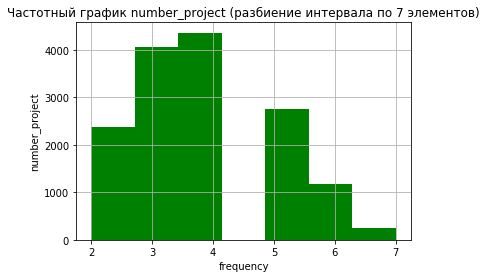

In [50]:
#рассчитываем среднее,медиана,мода,мин/макс,сред.отклонение для number_project
df=df.dropna(subset=['number_project'])
print('Среднее для number_project:', statistics.mean(df['number_project']))
print('Медиана для number_project:', statistics.median(df['number_project']))
print('Значение моды для number_project:', statistics.mode(df['number_project']))
print('Минимальное значение для number_project:', min(df['number_project']))
print('Максимальное значение для number_project:', max(df['number_project']))
print('Стандартное отклонение для number_project:', statistics.pstdev(df['number_project']))
n, bins, patches = plt.hist(df['number_project'], 7, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('number_project')
plt.title('Частотный график number_project (разбиение интервала по 7 элементов)')
plt.grid(True)
plt.show()

Среднее для average_montly_hours: 201.0503366891126
Медиана для average_montly_hours: 200
Значение моды для average_montly_hours: [(135, 153)]
Минимальное значение для average_montly_hours: 96
Максимальное значение для average_montly_hours: 310
Стандартное отклонение для average_montly_hours: 49.94143446256218


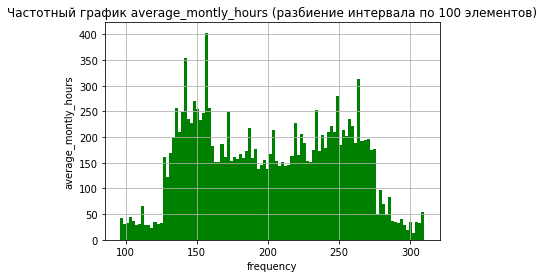

In [52]:
#рассчитываем среднее,медиана,мода,мин/макс,сред.отклонение для average_montly_hours
df=df.dropna(subset=['average_montly_hours'])
print('Среднее для average_montly_hours:', statistics.mean(df['average_montly_hours']))
print('Медиана для average_montly_hours:', statistics.median(df['average_montly_hours']))
#print('Значение моды для average_montly_hours:', statistics.mode(df['average_montly_hours']))
from collections import Counter
c = Counter(df['average_montly_hours'])
print('Значение моды для average_montly_hours:', c.most_common(1))
print('Минимальное значение для average_montly_hours:', min(df['average_montly_hours']))
print('Максимальное значение для average_montly_hours:', max(df['average_montly_hours']))
print('Стандартное отклонение для average_montly_hours:', statistics.pstdev(df['average_montly_hours']))
n, bins, patches = plt.hist(df['average_montly_hours'], 100, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('average_montly_hours')
plt.title('Частотный график average_montly_hours (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Среднее для time_spend_company: 3.498233215547703
Медиана для time_spend_company: 3
Значение моды для time_spend_company: 3
Минимальное значение для time_spend_company: 2
Максимальное значение для time_spend_company: 10
Стандартное отклонение для time_spend_company: 1.4600875552715114


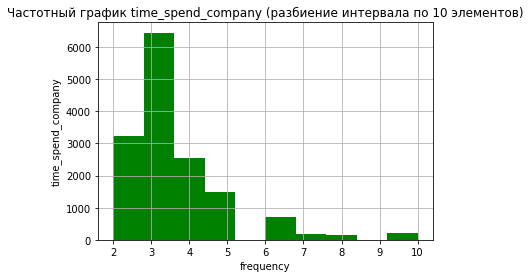

In [53]:
#рассчитываем среднее,медиана,мода,мин/макс,сред.отклонение для time_spend_company
df=df.dropna(subset=['time_spend_company'])
print('Среднее для time_spend_company:', statistics.mean(df['time_spend_company']))
print('Медиана для time_spend_company:', statistics.median(df['time_spend_company']))
print('Значение моды для time_spend_company:', statistics.mode(df['time_spend_company']))
print('Минимальное значение для time_spend_company:', min(df['time_spend_company']))
print('Максимальное значение для time_spend_company:', max(df['time_spend_company']))
print('Стандартное отклонение для time_spend_company:', statistics.pstdev(df['time_spend_company']))
n, bins, patches = plt.hist(df['time_spend_company'], 10, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('time_spend_company')
plt.title('Частотный график time_spend_company (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

**3. Рассчитаем и визуализируем корреляционную матрицу для переменных**

Переменные не вызывают подозрение на выбросы. Распределение нормальное. Чем коэффициент ближе к 0, тем более независимы переменные. Согласно матрице корреляции, зависимость прослеживается между:
* уровнем удовлетворенности сотрудника (satisfaction_level) и тем, что сотрудник покинул компанию (left);
* зависимость между происшествиями на работе (Work_accident) и тем, что сотрудник покинул компанию (left);
* уровнем удовлетворенности сотрудника (satisfaction_level) и количеством проектов (number_project);
* время, отработанное в компании (time_spend_company) и уровень удовлетворенности сотрудника (satisfaction_level);
* количество проектов (number_project) и среднее количество рабочих часов в месяц (average_montly_hours). 

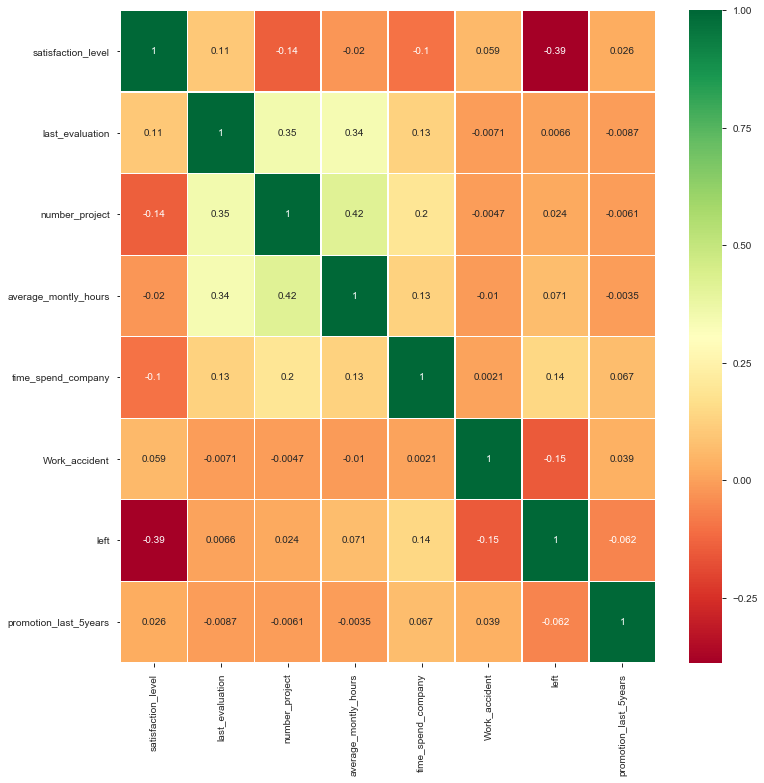

In [150]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**4. Визуализируем несколько взаимосвязей между переменными.** 

In [131]:
#sns.pairplot(df, vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours'], kind='scatter')

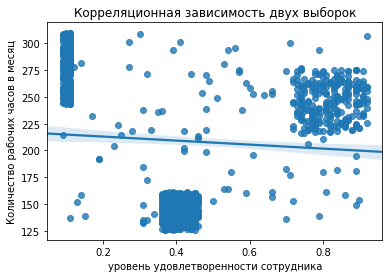

In [113]:
satisfaction_level_v = df['satisfaction_level'].head(1000)
average_montly_hours_v= df['average_montly_hours'].head(1000)
sns.regplot(x= satisfaction_level_v, y=average_montly_hours_v,data=df, fit_reg=True)
plt.xlabel('Уровень удовлетворенности сотрудника')
plt.ylabel('Количество рабочих часов в месяц')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

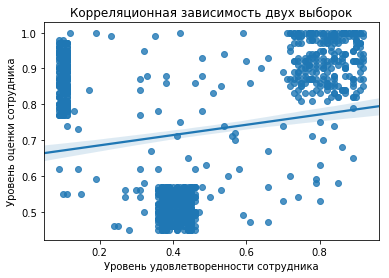

In [117]:
satisfaction_level_v = df['satisfaction_level'].head(1000)
last_evaluation_v= df['last_evaluation'].head(1000)
sns.regplot(x= satisfaction_level_v, y=last_evaluation_v,data=df, fit_reg=True)
plt.xlabel('Уровень удовлетворенности сотрудника')
plt.ylabel('Уровень оценки сотрудника')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

**5.С использованием t-test статистики t-Критерий Стьюдента проверим взаимосвязь между несколькими переменными.**

Проверим взаимосвязь выборки уровень удовлетворенности сотрудников которые работают и теми, кто покинул компанию.
T-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. **Чем выше t, тем более различны группы между собой.** Чем меньше t, тем более похожи группы и результаты повторятся.
p-значение — это вероятность получить результаты, схожие по значимости с наблюдаемыми в исследовании. **Статистически значимым** (и позволяющим отвергнуть нулевую гипотезу)при этом считается результат, р-значение которого равно уровню значимости или меньше его. Это, как правило, обозначается следующим образом: p ≤ 0,05.

In [120]:
satisfaction_level_working_staff = df[df['left']==0]['satisfaction_level']

satisfaction_level_not_working_staff = df[df['left']==1]['satisfaction_level']

stats.ttest_ind(satisfaction_level_working_staff, satisfaction_level_not_working_staff)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [137]:
len(df[df['left']==0]['satisfaction_level']), len(df[df['left']==1]['satisfaction_level'])

(11428, 3571)

In [144]:
satisfaction_level_v0=df[df['left']==0]['satisfaction_level'].sample(n=1000, replace=True)
satisfaction_level_v1=df[df['left']==1]['satisfaction_level'].sample(n=1000, replace=True)

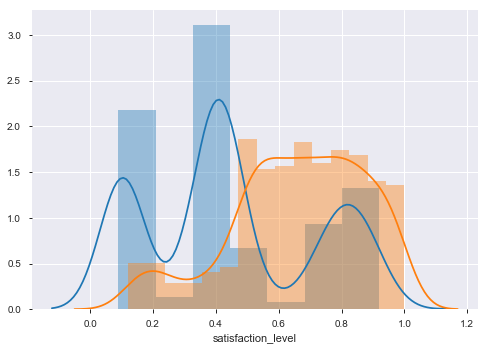

In [145]:
sns.distplot(satisfaction_level_v1)
sns.distplot(satisfaction_level_v0)

**T-значение 51.61, p-value равно 0.**
Имеется статистическое различие между выборками по удовлетворенности сотрудников перед уходом. 

In [121]:
satisfaction_level_working_staff = df[df['left']==0]['last_evaluation']

satisfaction_level_not_working_staff = df[df['left']==1]['last_evaluation']

stats.ttest_ind(satisfaction_level_working_staff, satisfaction_level_not_working_staff)

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)

In [147]:
last_evaluation_v0=df[df['left']==0]['last_evaluation'].sample(n=1000, replace=True)
last_evaluation_v1=df[df['left']==1]['last_evaluation'].sample(n=1000, replace=True)

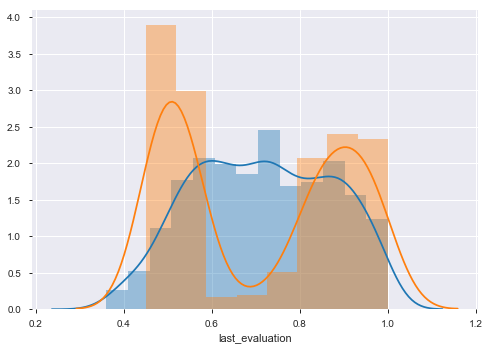

In [148]:
sns.distplot(last_evaluation_v0)
sns.distplot(last_evaluation_v1)

In [149]:
stats.ttest_ind(last_evaluation_v0, last_evaluation_v1)

Ttest_indResult(statistic=1.0177895886039268, pvalue=0.30890118658345395)

**T-значение 1.017, p-value равно 0.3**
Имеется статистическое различие между выборками по оценке сотрудников перед уходом и работающих на данный момент. 

**6. Рассчитаем сколько работников работает в каждом департаменте.**

In [90]:
df_sales=df['sales'].value_counts()
print(df_sales)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64


**7.Покажем распределение сотрудников по зарплатам.**

In [91]:
df_salary=df['salary'].value_counts()
print(df_salary)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


**8.Покажем распределение сотрудников по зарплатам совместно с департаментами.**

In [183]:
df_salary_by_sales=df.groupby(['salary', 'sales']).count()[['satisfaction_level']]
df_salary_by_sales.columns = ['number']
df_salary_by_sales

number
salary sales              
high   IT               83
       RandD            51
       accounting       74
       hr               45
       management      225
       marketing        80
       product_mng      68
       sales           269
       support         141
       technical       201
low    IT              609
       RandD           364
       accounting      358
       hr              335
       management      180
       marketing       402
       product_mng     451
       sales          2099
       support        1146
       technical      1372
medium IT              535
       RandD           372
       accounting      335
       hr              359
       management      225
       marketing       376
       product_mng     383
       sales          1772
       support         942
       technical      1147

**9.Рассчитаем сколько сотрудников покинули компанию**

In [83]:
df_left=df[ df['left'] == 1 ]['left'].count()
print('Компанию покинуло', df_left, 'человек')

Компанию покинуло 3571 человек


**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

**Гипотеза 1. Сотрудники покидают компанию из-за высокой загрузки.**
Предположим, что у уволенных сотрудников ('left'==1) была большая назрузка (average_montly_hours). Сравним ее с генеральной совокупностью. Нулевая гипотеза - что увольнения не связана с нагрузкой. Т.о. выборки average_montly_hours для сотрудников покинувших компанию и всех сотрудников одинаковы. Нагрузка не влияет на уход сотрудников из компании. 

In [165]:
average_montly_hours_for_left = df[df['left']==1]['average_montly_hours']
stats.ttest_1samp(average_montly_hours_for_left, df['average_montly_hours'].mean())

Ttest_1sampResult(statistic=6.218506380185923, pvalue=5.598760530139529e-10)

T-значение 6.21 и в одновыборочном критерии мы оцениваем p-value.
p-value равно 5.5, что намного больше стандартной альфа ошибки 0.05. Принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между загрузкой уволенных сотрудников и генеральной совокупностью. 

In [170]:
len(df[df['left']==1]['average_montly_hours']), len(df['average_montly_hours'])

(3571, 14999)

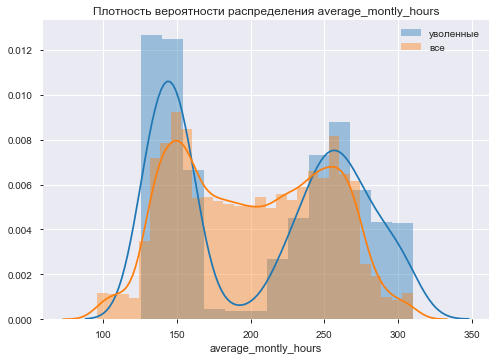

In [171]:
average_montly_hours_v1 = df[df['left']==1]['average_montly_hours']
average_montly_hours_v = df['average_montly_hours']
sns.distplot(average_montly_hours_v1)
sns.distplot(average_montly_hours_v)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['уволенные', 'все'])
plt.show()

**Гипотеза 2. Сотрудники покидают компанию из-за зарплаты.**
Предположим, что у уволенных сотрудников ('left'==1) были Work_accident. Сравним ее с работающими сотрудниками. Нулевая гипотеза - что увольнения не связаны с Work_accident. Т.о. выборки Work_accident для сотрудников покинувших компанию и работающих сотрудников будут одинаковы. 

In [178]:
salary_0 = df[df['salary']=='low']['left']
salary_1 = df[df['salary']=='medium']['left']
salary_2 = df[df['salary']=='high']['left']
stats.f_oneway(salary_0, salary_1, salary_2)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

p-value равно 1.4, что намного больше стандартной альфа ошибки 0.05. Принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между зарплатами сотрудников. 